# Convolutional Neural Network (CNN): Birds VS Airplane

In [1]:
import torch
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

## Load Data

In [2]:
data_path = "../Chapter 7/Dataset/"

# train
cifar10 = datasets.CIFAR10(data_path,
                           train=True,
                           download=False,
                           transform=transforms.Compose([ 
                               transforms.ToTensor(),
                               transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                   (0.2470, 0.2435, 0.2616))
                           ]))

# test
cifar10_val = datasets.CIFAR10(data_path,
                               train=False,
                               download=False,
                               transform=transforms.Compose([ 
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=(0.4914, 0.4822, 0.4465),
                                                       std=(0.2470, 0.2435, 0.2616))
                               ]))

## Convert into Binary Dataset

In [3]:
label_map = {0:0, 2:1}
class_name = ['airplane', 'bird']

In [4]:
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

# Convolutional Neural Network (CNN)

In [5]:
import torch.nn as nn

In [6]:
conv = nn.Conv2d(3, 16, kernel_size=3)

conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [7]:
print(conv.weight.shape)
print(conv.bias.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [8]:
conv.weight[0]

tensor([[[ 0.1039, -0.0518, -0.1635],
         [ 0.1226, -0.1565, -0.1062],
         [ 0.0856,  0.1415,  0.1327]],

        [[-0.0805,  0.0590,  0.0992],
         [ 0.1629, -0.0657, -0.0124],
         [ 0.0117,  0.0593, -0.0602]],

        [[-0.0056,  0.1630,  0.0082],
         [ 0.0699,  0.0972,  0.1259],
         [-0.1475, -0.1664,  0.1893]]], grad_fn=<SelectBackward0>)

#### Visualize

In [9]:
img, _ = cifar2[0]

In [10]:
output = conv(img.unsqueeze(0))

print(img.unsqueeze(0).shape)
print(output.shape)

torch.Size([1, 3, 32, 32])
torch.Size([1, 16, 30, 30])


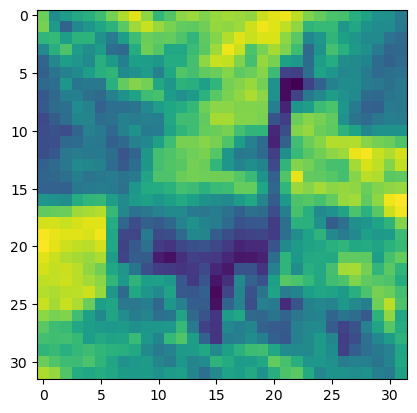

In [11]:
plt.imshow(output[0, 0].detach())
plt.imshow(img.unsqueeze(0)[0, 0].detach())
plt.show()

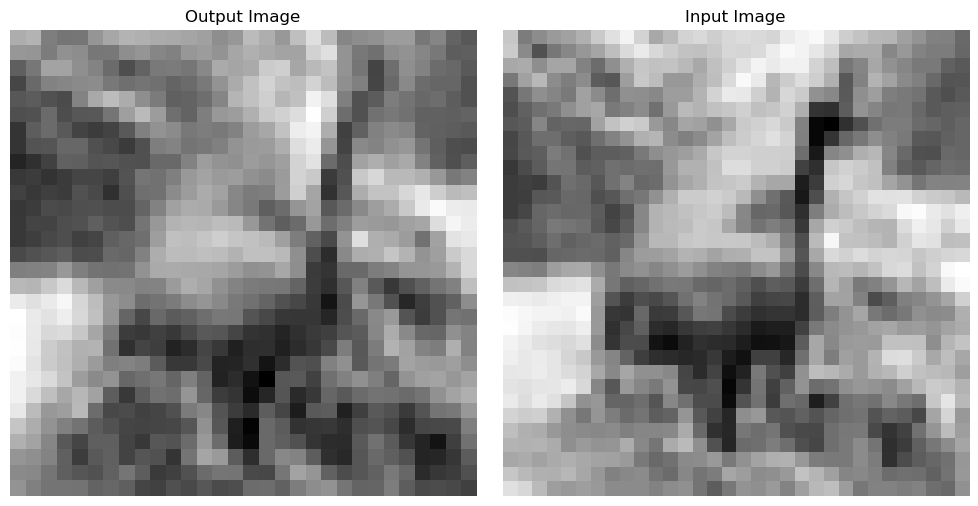

In [12]:
output_image = output[0, 0].detach()
input_image = img.unsqueeze(0)[0, 0].detach()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns for side-by-side images

# Display the first image with a label
axes[0].imshow(output_image, cmap='gray')  # Add cmap='gray' for grayscale images
axes[0].set_title('Output Image')         # Set title
axes[0].axis('off')                       # Remove axis for better visualization

# Display the second image with a label
axes[1].imshow(input_image, cmap='gray')
axes[1].set_title('Input Image')
axes[1].axis('off')

# Show the plot
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Experimenting with weights & Bias

In [13]:
with torch.no_grad():
    conv.bias.zero_()

with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

In [14]:
conv.weight, conv.bias

(Parameter containing:
 tensor([[[[0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111]],
 
          [[0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111]],
 
          [[0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111]]],
 
 
         [[[0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111]],
 
          [[0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111]],
 
          [[0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111]]],
 
 
         [[[0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111]],
 
          [[0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111],
           [0.1111, 0.1111, 0.1111]],
 
          [[0.1111, 0.1111, 0.1111],
           [0.1111, 0.

#### Visualize impact on image

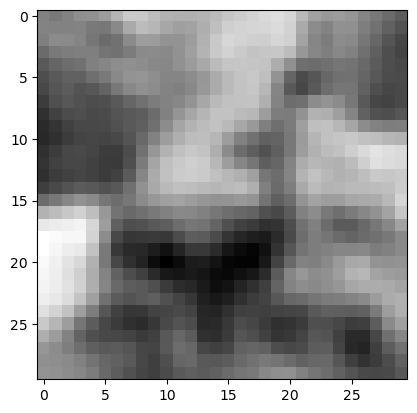

In [15]:
output = conv(img.unsqueeze(0))

plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [16]:
# 2nd experiment
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

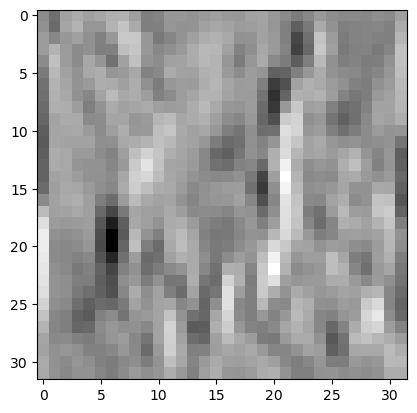

In [17]:
output = conv(img.unsqueeze(0))

plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

## Create nn Submodule

In [18]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        # fully connected layer
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        # conv layer 1
        conv = self.conv1(x)
        act = self.act1(conv)
        out = self.pool1(act)
        # conv layer 2
        conv = self.conv2(out)
        act = self.act2(conv)
        out = self.pool2(act)
        # reshape into linear vector
        out = out.view(-1, 8 * 8 * 8)
        # FNN layer 1
        fc = self.fc1(out)
        out = self.act3(fc)
        # FNN layer 2
        out = self.fc2(out)

        return out



In [19]:
# call model
model = Net()

In [20]:
numel_list = [p.numel() for p in model.parameters()]

print(sum(numel_list))
print(numel_list)

18090
[432, 16, 1152, 8, 16384, 32, 64, 2]


Check model runs properly

In [21]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.0138, -0.0629]], grad_fn=<AddmmBackward0>)

In [29]:
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
print(f"Training on device {device}.")

Training on device cuda.


## Training our convnet

In [30]:
import torch.optim as optim

# Define all parameters
n_epochs = 100
learning_rate = 1e-2

# model
model = Net()
model.to(device)

# loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [23]:
from torch.utils.data import Dataset, DataLoader

batch_size = 64
train_loader = DataLoader(cifar2, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(cifar2_val, batch_size=batch_size, shuffle=False)

In [33]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):

    for epoch in range(1, n_epochs+1):
        loss_train = 0.0

        for batch_img, batch_label in train_loader:

            # move to gpu
            batch_img = batch_img.to(device)
            batch_label = batch_label.to(device)

            outputs = model(batch_img)

            loss = loss_fn(outputs, batch_label)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print(f"{datetime.datetime.now()} Epoch:{epoch}, Training loss {loss_train/ len(train_loader)}")

In [34]:
# call training loop
training_loop(
    n_epochs= n_epochs,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)

2025-01-21 13:48:18.752845 Epoch:1, Training loss 0.5456858622800013
2025-01-21 13:48:22.163990 Epoch:10, Training loss 0.3277852932928474
2025-01-21 13:48:26.422088 Epoch:20, Training loss 0.28622519039804006
2025-01-21 13:48:30.575972 Epoch:30, Training loss 0.26320530626044913
2025-01-21 13:48:32.428935 Epoch:40, Training loss 0.2438484908194299
2025-01-21 13:48:36.312695 Epoch:50, Training loss 0.22904230046803783
2025-01-21 13:48:40.043998 Epoch:60, Training loss 0.21272154736101248
2025-01-21 13:48:43.704685 Epoch:70, Training loss 0.19753842587303963
2025-01-21 13:48:47.671138 Epoch:80, Training loss 0.18327256695480104
2025-01-21 13:48:51.326212 Epoch:90, Training loss 0.17135232860210595
2025-01-21 13:48:55.030930 Epoch:100, Training loss 0.15346266829948516


##  Measuring accuracy

In [35]:
def validate(model, train_loader, test_loader):

    for name, loader in [("train", train_loader), ("test", test_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():
            for batch_img, batch_label in loader:

                # move to gpu
                batch_img = batch_img.to(device)
                batch_label = batch_label.to(device)
                
                outputs = model(batch_img)
                _, predicted = torch.max(outputs, dim=1)
                total += batch_label.shape[0]
                correct += int((predicted == batch_label).sum())

        print(f"Accuracy {name}: {correct / total:.2f}")

In [36]:
validate(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
)

Accuracy train: 0.93
Accuracy test: 0.88


### Save model

In [37]:
torch.save(model.state_dict(), 'birds_vs_airplanes.pt')

In [39]:
loaded_model = Net()

loaded_model.load_state_dict(torch.load('birds_vs_airplanes.pt'))

/tmp/ipykernel_500/831531318.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('birds_vs_airplanes.pt'))


<All keys matched successfully>